2) From the data set, Bike_data, treat ‘atemp’ as independent variable and ‘bike_rental’ as dependent variable and implement the cost function for linear regression (MSE). Also find out the optimum weight and bias terms for the same. (Define your own gradient descent function)


In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression

import warnings
warnings.simplefilter("ignore")
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split 

In [2]:
df = pd.read_csv("Bike_data.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,bike_rental
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'bike_rental'],
      dtype='object')

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,731.0,366.000000,211.165812,1.000000,183.500000,366.000000,548.500000,731.000000
season,731.0,2.496580,1.110807,1.000000,2.000000,3.000000,3.000000,4.000000
yr,731.0,0.500684,0.500342,0.000000,0.000000,1.000000,1.000000,1.000000
mnth,731.0,6.519836,3.451913,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,731.0,0.028728,0.167155,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,731.0,2.997264,2.004787,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,731.0,0.683995,0.465233,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,731.0,1.395349,0.544894,1.000000,1.000000,1.000000,2.000000,3.000000
temp,731.0,0.495385,0.183051,0.059130,0.337083,0.498333,0.655417,0.861667
atemp,731.0,0.474354,0.162961,0.079070,0.337842,0.486733,0.608602,0.840896


In [6]:
df.duplicated().sum()

0

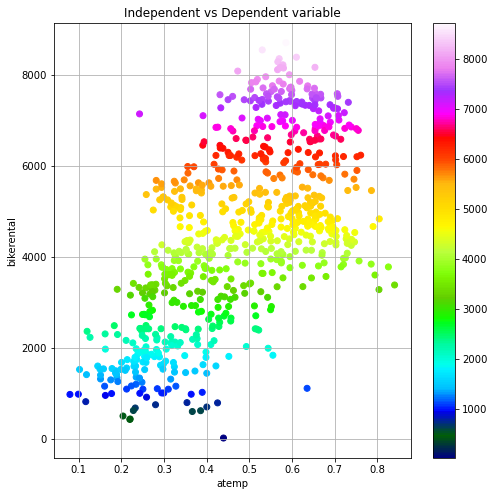

In [7]:
plt.figure(figsize=(8,8))
plt.scatter(x=df["atemp"],y=df["bike_rental"], c=df['bike_rental'], cmap='gist_ncar')
plt.colorbar()
plt.ylabel("bikerental")
plt.xlabel("atemp")
plt.title("Independent vs Dependent variable")
plt.grid(True)

In [8]:
df['dteday'] = pd.to_datetime(df['dteday'])
df['date'] = df['dteday'].dt.day 

In [9]:
df.drop(columns=['dteday'],axis=1,inplace=True)

In [10]:
df.tail()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,bike_rental,date
726,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114,27
727,728,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095,28
728,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341,29
729,730,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796,30
730,731,1,1,12,0,1,1,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729,31


In [11]:
categoryList = ["season", "yr","mnth","holiday","weekday","workingday","weathersit","date"]
for var in categoryList:
    df[var] = df[var].astype("category")


<AxesSubplot:xlabel='weathersit', ylabel='bike_rental'>

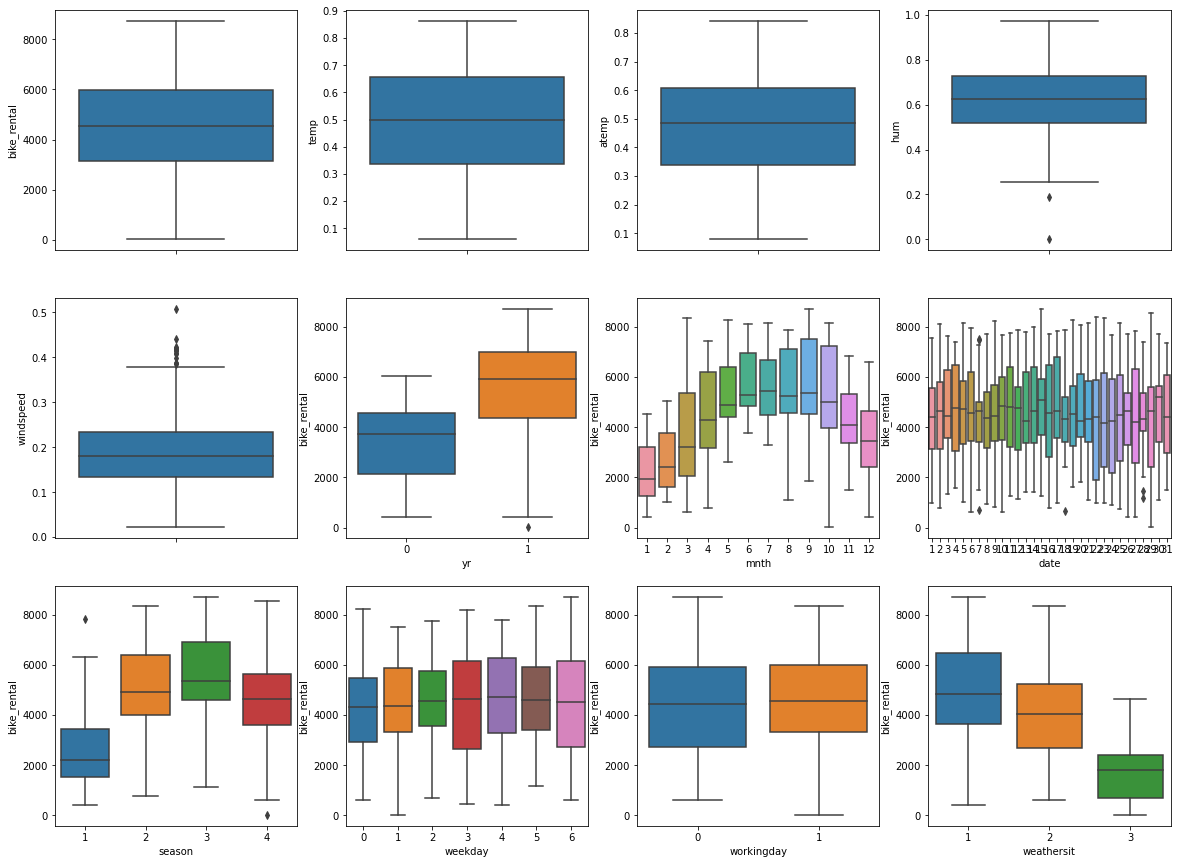

In [12]:
fig, axes = plt.subplots(nrows=3,ncols=4)
fig.set_size_inches(20,15)

sns.boxplot(data=df, y="bike_rental",ax=axes[0][0])
sns.boxplot(data=df, y="temp",ax=axes[0][1])
sns.boxplot(data=df, y="atemp",ax=axes[0][2])
sns.boxplot(data=df, y="hum",ax=axes[0][3])
sns.boxplot(data=df, y="windspeed",ax=axes[1][0])
sns.boxplot(data=df,y="bike_rental",x="yr",ax=axes[1][1])
sns.boxplot(data=df,y="bike_rental",x="mnth",ax=axes[1][2])
sns.boxplot(data=df,y="bike_rental",x="date",ax=axes[1][3])
sns.boxplot(data=df,y="bike_rental",x="season",ax=axes[2][0])
sns.boxplot(data=df,y="bike_rental",x="weekday",ax=axes[2][1])
sns.boxplot(data=df,y="bike_rental",x="workingday",ax=axes[2][2])
sns.boxplot(data=df,y="bike_rental",x="weathersit",ax=axes[2][3])

In [13]:
def outlier_detect(f):
    for i in f.describe().columns:
        Q1=f.describe().at['25%',i]
        Q3=f.describe().at['75%',i]
        IQR=Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        x=np.array(f[i])
        p=[]
        for j in x:
            if j < lower or j>upper:
                p.append(f[i].median())
            else:
                p.append(j)
        f[i]=p
    return f

In [14]:
outlier_detect(df)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,bike_rental,date
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331.0,654,985,1
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131.0,670,801,2
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120.0,1229,1349,3
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108.0,1454,1562,4
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82.0,1518,1600,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247.0,1867,2114,27
727,728,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644.0,2451,3095,28
728,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159.0,1182,1341,29
729,730,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364.0,1432,1796,30


<AxesSubplot:title={'center':'Correlation of features with the response variable count_of_rented_bikes'}>

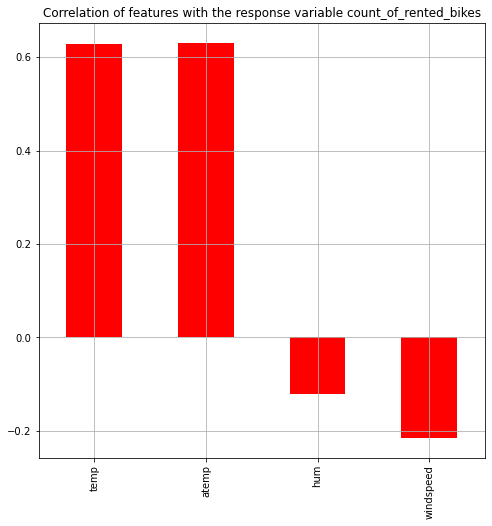

In [15]:
corr = df[['temp','atemp','hum','windspeed']].corrwith(df['bike_rental'])
corr.plot.bar(figsize=(8,8), title='Correlation of features with the response variable count_of_rented_bikes', 
              grid=True, legend=False, style=None, fontsize=None, colormap='flag', label=None)

In [16]:
df.corr()

,instant,temp,atemp,hum,windspeed,casual,registered,bike_rental
instant,1.000000,0.150580,0.152638,0.001615,-0.114910,0.222655,0.659623,0.628830
temp,0.150580,1.000000,0.991702,0.123732,-0.139244,0.582916,0.540012,0.627494
atemp,0.152638,0.991702,1.000000,0.137320,-0.164492,0.582033,0.544192,0.631066
hum,0.001615,0.123732,0.137320,1.000000,-0.200729,-0.079477,-0.112143,-0.121426
windspeed,-0.114910,-0.139244,-0.164492,-0.200729,1.000000,-0.179359,-0.203362,-0.215571
casual,0.222655,0.582916,0.582033,-0.079477,-0.179359,1.000000,0.423988,0.600282
registered,0.659623,0.540012,0.544192,-0.112143,-0.203362,0.423988,1.000000,0.945517
bike_rental,0.628830,0.627494,0.631066,-0.121426,-0.215571,0.600282,0.945517,1.000000


### we can see 'atemp' and 'temp' are highly co related

In [17]:
#dropping temp, 94% corelated
df.drop(columns=['temp'],axis=1,inplace=True)

<AxesSubplot:xlabel='bike_rental', ylabel='Density'>

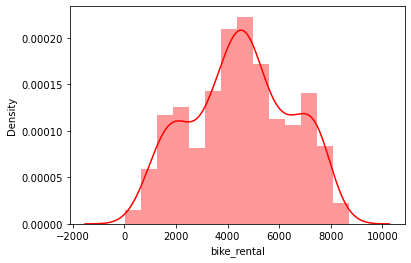

In [18]:
#checking target variable distribution
sns.distplot(df['bike_rental'],color ='r')

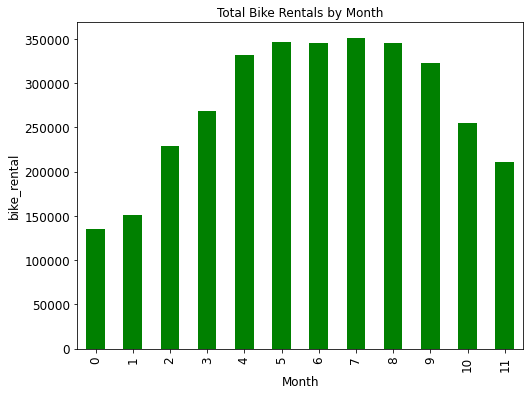

In [19]:
br = df[['mnth','bike_rental']].groupby(['mnth']).sum().reset_index().plot(kind='bar', figsize=(8, 6),
                                       legend = False, title ="Total Bike Rentals by Month", 
                                       color='green', fontsize=12)
br.set_xlabel("Month", fontsize=12)
br.set_ylabel("bike_rental", fontsize=12)
plt.show()

<AxesSubplot:>

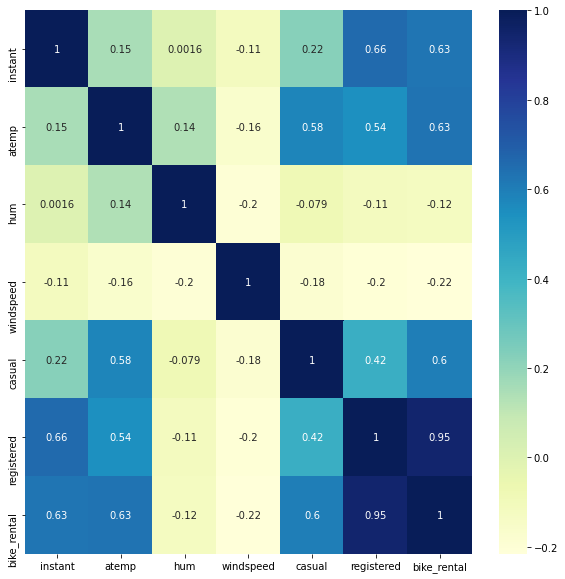

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu")

In [21]:
X = df.drop(columns=["bike_rental"],axis=1)
y = df["bike_rental"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

from sklearn import linear_model
lr_model = linear_model.LinearRegression()

#training model in training set
lr_model.fit(X_train, y_train)

# making predection using the test set
y_pred = lr_model.predict(X_test)

In [23]:
lr_model.score(X_test,y_test)

0.9745359370573932

In [24]:
# we check the root mean square error (RMSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(rmse)

318.3090363587687


In [25]:
#accuracy
print("Accuracy of the model is: ", (lr_model.score(X_test,y_test))*100)

Accuracy of the model is:  97.45359370573932


### Accuracy of the model is:  97.45359370573932